# Currently contains boxcox transofrmations on continous data and some simple PCA calculations


## 1. Initializing data

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional


In [1]:


import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


dataset = pd.read_csv('energydata_complete.csv')
#Data = np.loadtxt(open("ProjectdataNotime.csv", "rb"), delimiter=",", skiprows=1)


In [2]:
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


## Transforming the data

In [3]:
# Boxcox transformations on the least normal datasets: Manually chosen.
dataset['T2'] = stats.boxcox(dataset['T2'], -1)
dataset['RH_3'] = stats.boxcox(dataset['RH_3'], 1)
dataset['RH_4'] = stats.boxcox(dataset['RH_4'], -1)
dataset['T5'] = stats.boxcox(dataset['T5'], -1)
dataset['RH_5'] = stats.boxcox(dataset['RH_5'], -1)
dataset['T6'] = stats.boxcox(dataset['T6']+10, 0.5)
dataset['RH_9'] = stats.boxcox(dataset['RH_9'], -0.5)
dataset['T_out'] = stats.boxcox(dataset['T_out']+10, 0.5)

In [4]:
X_cont = dataset.iloc[:, 3:-2].values # the continous datatypes 
Y = dataset.iloc[:,0:2].values # the other data (discrete and label)

## 2.1 Standardizing continous variables

In [5]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()

In [6]:
# 
#X_ctrain = sc_X.fit_transform(X_ctrain)
#X_ctest = sc_X.transform(X_ctest)

# Code Something: Initial PCA's

In [36]:
dataset = pd.read_csv('preprocessed.csv')

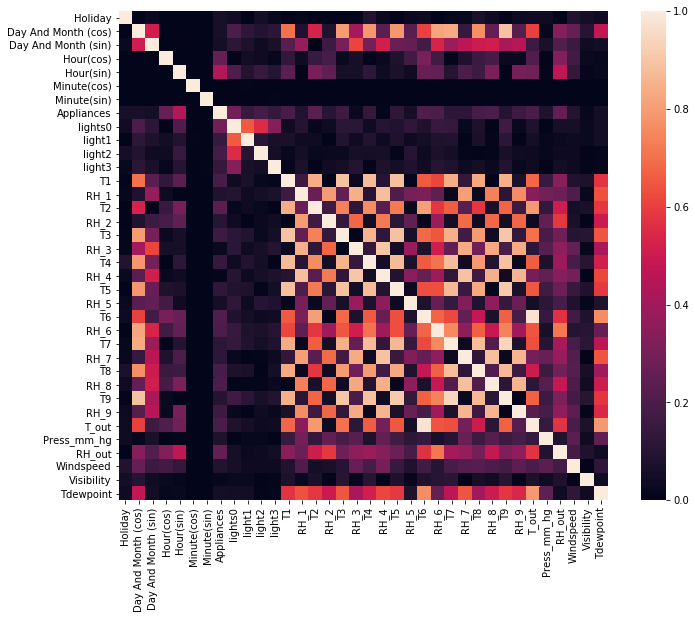

In [72]:
corrmat = dataset.corr()
f, ax = pl.subplots(figsize=(12, 9))
corfig=sns.heatmap(np.abs(corrmat), vmax=1, square=True); # Creates a map of the correlations of the data ()

In [74]:
corfig.get_figure().savefig("records/Correlationmap.png")

## PCA on temperatures

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc_T=StandardScaler()
##Seeing that the multitude of temperatures bring very littnle variance:
Tempmat = [dataset['T1'].values,
           dataset['T2'].values,
           dataset['T3'].values,
           dataset['T4'].values,
           dataset['T5'].values,
           dataset['T6'].values,
           dataset['T7'].values,
           dataset['T8'].values,
           dataset['T9'].values]
#Tempmat=sc_T.fit_transform(Tempmat)

In [45]:
pca_temp = PCA(n_components=2)
pca_temp.fit(Tempmat)
a1=pca_temp.explained_variance_ratio_
b1=pca_temp.components_

In [46]:
a1

array([0.45574682, 0.17049854])

## PCA on humidity

In [47]:
from sklearn.decomposition import PCA
sc_H=StandardScaler()
##Seeing that the multitude of temperatures bring very littnle variance:
Hummat = [dataset['RH_1'].values,
           dataset['RH_2'].values,
           dataset['RH_3'].values,
           dataset['RH_4'].values,
           dataset['RH_5'].values,
           dataset['RH_6'].values,
           dataset['RH_7'].values,
           dataset['RH_8'].values,
           dataset['RH_9'].values]
#Hummat=sc_H.fit_transform(Hummat)

In [55]:
pca_hum = PCA(n_components=2)
pca_hum.fit(Hummat)
a2=pca_hum.explained_variance_ratio_
b2=pca_hum.components_

In [56]:
a2

array([0.38892349, 0.24803911])

## Can you do both? 

In [64]:
Combmat= [dataset['T1'].values,
           dataset['T2'].values,
           dataset['T3'].values,
           dataset['T4'].values,
           dataset['T5'].values,
           dataset['T6'].values,
           dataset['T7'].values,
           dataset['T8'].values,
           dataset['T9'].values,
           dataset['RH_1'].values,
           dataset['RH_2'].values,
           dataset['RH_3'].values,
           dataset['RH_4'].values,
           dataset['RH_5'].values,
           dataset['RH_6'].values,
           dataset['RH_7'].values,
           dataset['RH_8'].values,
           dataset['RH_9'].values]
pca_comb = PCA(n_components=5)
pca_comb.fit(Combmat)
a3=pca_comb.explained_variance_ratio_
b3=pca_comb.components_

In [65]:
sum(a3)

0.8912807216913998

In [52]:
pca_all = PCA(n_components=6)
pca_all.fit(dataset.iloc[:, T1:-2].values)
a=pca_all.explained_variance_ratio_
b=pca_all.components_

NameError: name 'T1' is not defined

In [34]:
sum(a)

0.8846601058552063

In [37]:
dataset

,Holiday,Day And Month (cos),Day And Month (sin),Hour(cos),Hour(sin),Minute(cos),Minute(sin),Appliances,lights0,light1,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,1.0,0.000000e+00,-0.495142,0.0,0.0,...,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.822080,1.207694,2.091596,0.366975
1,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,0.5,8.660254e-01,-0.495142,0.0,0.0,...,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.822080,1.071703,1.766584,0.343135
2,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,-0.5,8.660254e-01,-0.734818,0.0,0.0,...,-1.957509,1.109032,-1.233869,0.950910,-0.196529,-2.949298,0.822080,0.935713,1.441572,0.319294
3,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,-1.0,1.224647e-16,-0.734818,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.926821,-0.218470,-2.935783,0.822080,0.799723,1.116559,0.295454
4,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,-0.5,-8.660254e-01,-0.495142,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.926821,-0.240411,-2.922268,0.822080,0.663733,0.791547,0.271613
5,1.0,0.98524,0.171177,-2.588190e-01,-0.965926,0.5,-8.660254e-01,-0.734818,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.900324,-0.262352,-2.908753,0.822080,0.527743,0.466534,0.247773
6,1.0,0.98524,0.171177,-1.836970e-16,-1.000000,1.0,0.000000e+00,-0.495142,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.900324,-0.284293,-2.895238,0.822080,0.391753,0.141522,0.223932
7,1.0,0.98524,0.171177,-1.836970e-16,-1.000000,0.5,8.660254e-01,-0.495142,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.900324,-0.281159,-2.886228,0.810895,0.459748,0.141522,0.219959
8,1.0,0.98524,0.171177,-1.836970e-16,-1.000000,-0.5,8.660254e-01,-0.495142,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.900324,-0.278024,-2.877219,0.799710,0.527743,0.141522,0.215985
9,1.0,0.98524,0.171177,-1.836970e-16,-1.000000,-1.0,1.224647e-16,-0.245254,0.0,0.0,...,-2.008631,1.082233,-1.233869,0.900324,-0.274890,-2.868209,0.788525,0.595738,0.141522,0.212012


# LDA 

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()



lightlabel = dataset.iloc[:,'lights0'].copy
lightlabel[int(dataset.iloc[:,'lights0'].values[])] = 0
lightlabel[dataset['lights1'==1].values] = 1
lightlabel[dataset['lights2'==1]] = 2
lightlabel[dataset['lights3'==1]] = 3


SyntaxError: invalid syntax (<ipython-input-28-26456a74c861>, line 7)

In [19]:
lightlabel

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
19705    1.0
19706    1.0
19707    1.0
19708    1.0
19709    1.0
19710    0.0
19711    1.0
19712    1.0
19713    1.0
19714    1.0
19715    1.0
19716    1.0
19717    1.0
19718    1.0
19719    1.0
19720    1.0
19721    1.0
19722    1.0
19723    1.0
19724    1.0
19725    1.0
19726    1.0
19727    1.0
19728    1.0
19729    1.0
19730    1.0
19731    1.0
19732    0.0
19733    0.0
19734    0.0
Name: lights0, Length: 19735, dtype: float64

In [27]:
sum(dataset['light3'][dataset['light3']==1] )


647.0

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

data = pd.read_csv('preprocessed.csv')

#%%y_data: lightcategories, x_data: all but light and appliances (maybe sort time).
y_data = np.zeros(len(data))
for i in range(len(y_data)):
    if data['light1'][i] == 1:
        y_data[i] = 1
    elif data['light2'][i] == 1:
        y_data[i] = 2
    elif data['light3'][i] == 1:
        y_data[i] = 3

X_data = data.drop(['Appliances', 'lights0', 'light1', 'light2', 'light3'], axis=1)

clf = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)
clf.fit(X_data, y_data)

#test = 1
#print('Test:', clf.predict([X_data.iloc[test,:]]))
#print('Real:', y_data[test])

# Testing accuracy
Acc = 0
for i in range(len(y_data)):
    if clf.predict([X_data.iloc[i,:]]) == y_data[i]:
        Acc = Acc+1

Acc = Acc/len(y_data)
print('Accuracy:', Acc)

#%% Splitting for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=42)
clf.fit(X_train, Y_train)

#test = 1
#print('Test:', clf.predict([X_test.iloc[test,:]]))
#print('Real:', Y_test[test])

Acc = 0
for i in range(len(Y_test)):
    if clf.predict([X_test.iloc[i,:]]) == Y_test[i]:
        Acc = Acc+1

Acc = Acc/len(Y_test)
print('Accuracy:', Acc)

Accuracy: 0.7879402077527236
Accuracy: 0.7838864960729668


In [2]:
print('Test:', clf.predict([X_test.iloc[test,:]]))
print('Real:', Y_test[test])

NameError: name 'test' is not defined

In [3]:
X_test

,Holiday,Day And Month (cos),Day And Month (sin),Hour(cos),Hour(sin),Minute(cos),Minute(sin),T1,RH_1,T2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
8980,1.0,0.309835,0.950790,9.659258e-01,0.258819,-0.5,-8.660254e-01,-0.495989,-1.221286,-1.177071,...,0.531484,-0.610361,-0.097202,-0.607604,-1.061634,1.807939,0.576007,-0.696168,2.091596,-0.896572
2754,0.0,0.878124,0.478434,5.000000e-01,-0.866025,1.0,0.000000e+00,0.126666,3.226846,0.432657,...,-0.722065,0.885713,-1.586286,0.637762,-0.886105,-0.124689,0.687859,-0.424188,-0.960694,-0.610486
9132,1.0,0.293434,0.955979,7.071068e-01,0.707107,1.0,0.000000e+00,-0.184662,-1.196155,-1.234832,...,0.036242,-0.633490,-0.047565,-0.785857,-1.356271,1.443037,0.218082,-0.832158,2.261168,-1.468744
14359,1.0,-0.315962,0.948772,-8.660254e-01,0.500000,0.5,8.660254e-01,-0.184662,0.194410,1.618292,...,-0.423854,-0.927633,0.399160,-0.720819,0.270502,1.659275,-0.598434,0.459748,0.141522,-0.010499
8875,0.0,0.326144,0.945320,-5.000000e-01,0.866025,0.5,8.660254e-01,-1.072983,-1.289977,-1.768368,...,0.036242,-0.640509,-0.241146,-0.205329,-1.481649,1.909301,0.911562,-0.016218,0.890463,-1.242259
10239,1.0,0.176471,0.984306,2.588190e-01,-0.965926,-1.0,1.224647e-16,0.506486,1.115031,0.250251,...,0.513379,-0.964002,0.150979,-0.544974,0.026016,0.078035,-0.083917,-0.220203,-1.045480,0.045128
8348,1.0,0.390368,0.920659,-5.000000e-01,-0.866025,-0.5,8.660254e-01,-1.429972,-0.894587,-1.573802,...,-0.889063,-0.810869,-0.985688,-1.147182,-0.158916,-1.377067,-1.034654,0.527743,0.141522,-0.840944
15847,0.0,-0.473706,0.880683,-1.836970e-16,-1.000000,0.5,8.660254e-01,0.195158,0.052002,0.118007,...,0.388982,-1.034826,-0.029365,-0.920752,0.427224,0.695214,-0.855692,0.799723,0.141522,-0.014473
13166,1.0,-0.182817,0.983147,7.071068e-01,0.707107,-0.5,8.660254e-01,0.126666,0.711264,-0.383607,...,0.342973,0.235902,0.663886,0.620097,0.035420,-0.539145,0.598377,-0.560178,0.141522,0.486178
7801,0.0,0.452745,0.891640,7.071068e-01,-0.707107,0.5,8.660254e-01,-0.987887,-0.768934,-1.190751,...,-0.377845,-1.392135,-0.720962,-1.457921,-0.798341,-1.539246,0.576007,-0.424188,-1.342231,-0.570751
